# Chyby a nestabilita

Naimportujeme si knihovny potřebné pro následující příklady:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Chyby - nepřesnosti při řešení numerických úloh
Zdroje chyb:
1. Chyby vstupních dat (např. chyby měření, chyby modelu reality)
2. Zaokrouhlovací chyby (roundoff errors) - v důsledku zaokrouhlování při výpočtech s čísly o konečné délce
3. Chyby metody (truncation errors) - v důsledku převedení matematické úlohy na numerickou

### Relativní a absolutní chyba

* **absolutní chyba** $= \|$přesná hodnota - přibližná hodnota$\|$
 * $A(x) = \| x  -\tilde{x}\|$
* **relativní chyba** $=$ absolutní chyba / $\|$přesná hodnota$\|$
 * $R(x) = \dfrac{A(x)}{\| x\|}$

### Zaokrouhlovací chyby

#### Reprezentace reálných čísel v počítači

* floating point (pohyblivá desetinná čárka): $\pm 1.23456789\times10^{\pm21}$ (znaménko $\pm$; mantisa 1.23456789; exponent $\pm21$)
* délka exponentu určuje rozsah
* délka manitsy určuje přesnost
 * v počítači je mezi 1 a 2 je konečný počet čísel 1, 1+$\epsilon$, 1+$2\epsilon$,...,2-$\epsilon$
 * čím menší $\epsilon$, tím menší jsou chyby v zaokrouhlování
* chyby při arimetických výpočtech v počítačích mohou mít své důsledky [[1](https://en.wikipedia.org/wiki/Ariane_5#Notable_launches), [2](https://en.wikipedia.org/wiki/Round-off_error#Real_world_example:_Patriot_missile_failure_due_to_magnification_of_roundoff_error)]


<div class="alert alert-block alert-warning"><b>Cvičení 02.01: </b> Odhadněte $\epsilon$ a odhad porovnejte se skutečnou hodnotou.</div>

Budeme postupovat tak, že počáteční odhad (libovolně vysoký) budeme postupně dělit dvěma tak dlouho, dokud po přičtení k jedničce dostaneme číslo větší než jedna.

In [2]:
# kod


#### Šíření chyb ve výpočtech

Motivace pro numerické postupy: vyhnout se odečítání dvou přibližně stejně velkých čísel:

In [3]:
# kod
a = 4.9
b = 4.845
c = a - b
print(c)

0.055000000000000604


* V počítači nemusí platit $(a + 1) - 1 = a$

<div class="alert alert-block alert-warning"><b>Cvičení 02.02: </b>Vypočítejte 1 + 1/3 - 1/3. Ověřte výsledek i pro případ, že byste výpočet provedli 100x.</div>

In [4]:
# kod


 * V počítači nemusí platit asociativnost sčítání $(a+b)+c = a+(b+c)$.

<div class="alert alert-block alert-warning"><b>Cvičení 02.03: </b>Mějme řadu definovanou jako $x_{n} = \dfrac{1}{n^{-1.1}}$. Sečtěte prvních 30 členů v jednom směru a v druhém směru.</div>

In [5]:
# kod


### Chyba metody

* Při výpočtech nahrazujeme nekonečně krátký krok $dx$ krokem $h$, který má konečnou délku.

#### Taylorův rozvoj
* $f(x+h)=\sum_{n}\dfrac{h^{n}f^{(n)}(x)}{n!}$
* Řád metody $\alpha$: chyba veličiny úměrná $h^{\alpha}$

##### Metoda prvního řádu (dopředná diference)
   * $f(x+h)=f(x)+hf'(x) + \mathcal{O}(h^{2})\rightarrow f'(x)=\dfrac{f(x+h)-f(x)}{h} + \dfrac{\mathcal{O}(h^{2})}{h}\rightarrow f'(x)=\dfrac{f(x+h)-f(x)}{h} +\mathcal{O}(h)$
   * získám aproximaci derivace $f'(x)\approx\dfrac{f(x+h)-f(h)}{h}$, přičemž zanedbám $\mathcal{O}(h)$

##### Metoda druhého řádu (centrální diference)
   * $f(x+h)=f(x)+hf'(x) + \dfrac{h^{2}}{2}f''(x)+\mathcal{O}(h^{3})$
   * $f(x-h)=f(x)-hf'(x) + \dfrac{h^{2}}{2}f''(x)+\mathcal{O}(h^{3})$
   * odečtením těchto dvou rovnic získám aproximaci derivace $f'(x)\approx\dfrac{f(x+h)-f(x-h)}{2h}$, přičemž zanedbám $\mathcal{O}(h^{2})$

<div class="alert alert-block alert-warning"><b>Cvičení 02.04:</b> Spočtěte numericky derivaci funkce $\sin(x)$ v bodě $x=\pi/6$ pomocí dopředné a centrální diference pro velikost kroku $h\in(\epsilon,\pi/6\rangle $. Zobrazte výsledek a velikost relativní chyby v závislosti na $h$.</div>

Měli bychom dojít k výsledku $\sqrt{3}/2\approx 0.866$, což mohu ověřit zadáním `derivative of sin(x) at x=pi/6` do [WolframAlpha](https://www.wolframalpha.com).

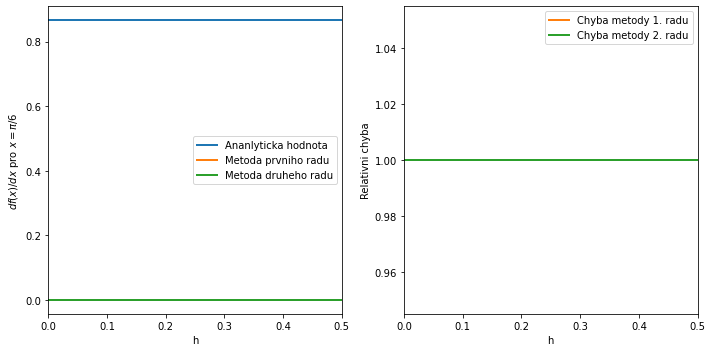

In [6]:
# kod

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def df(x):
    return np.cos(x)

#######################################
# vlozte funkci pocitajici doprednou diferenci:
#######################################
def num1_df(x,h):
    return 0
#######################################


#######################################
# vlozte funkci pocitajici centralni diferenci:
#######################################
def num2_df(x,h):
    return 0
#######################################

x = np.pi/6
h = x  # Pocatecni hodnota h

der_a = df(x) # Hodnota derivace analyticky
der_1 = num1_df(x,h) # Derivace metodou prvniho radu
der_2 = num2_df(x,h) # Derivace metodou druheho radu
krok  = h # Seznam pouzitych velikosti kroku

# Hledame hodnoty derivace v bode x v zavislosti na kroku h
while h > np.finfo(float).eps:
    der_a = np.append(der_a, df(x))
    der_1 = np.append(der_1, num1_df(x,h))
    der_2 = np.append(der_2 ,num2_df(x,h))
    krok  = np.append(krok, h)
    h = 0.9 * h

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(krok,der_a,linewidth=2,label='Ananlyticka hodnota')
ax[0].plot(krok,der_1,linewidth=2,label='Metoda prvniho radu')
ax[0].plot(krok,der_2,linewidth=2,label='Metoda druheho radu')
ax[0].set_xlabel('h')
ax[0].set_ylabel(r'$df(x)/dx$ pro $x=\pi/6$')
ax[0].set_xlim((0,0.5))
#ax[0].set_xscale('log')
ax[0].legend()

ax[1].plot(krok, np.abs((der_1-der_a)/der_a),c='C1',linewidth=2,label='Chyba metody 1. radu')
ax[1].plot(krok, np.abs((der_2-der_a)/der_a),color='C2',linewidth=2,label='Chyba metody 2. radu')
ax[1].set_xlabel('h')
ax[1].set_ylabel('Relativni chyba')
ax[1].set_xlim((0,0.5))
ax[1].legend()

fig.tight_layout()

## Numerická stabilita

<div class="alert alert-block alert-warning"><b>Cvičení 02.05:</b> Pomocí a) Eulerovy a b) dvoukrokové metody vypočítejte časový vývoj rychlosti meteoritu, který je v atmosféře exponenciálně brzděn, přičemž $v(0)=1$.</div>

Rychlost meteoritu lze popsat diferenciální rovnicí $\dfrac{dv}{dt}=-v(t)$. Jejím řešením je $v(t)=K\exp(-t)$. Konstatu $K$ najdeme pomocí počáteční podmínky $v(0)=1$, a tedy $K=1$.


* **a) Eulerova metoda (dopředná diference)**
 * derivaci nahradíme konečnou diferencí: $\dfrac{v(t+dt)-v(t)}{dt}=-v(t)$
 * odtud získám rychlost $v$ v čase $t+dt$: $v(d+dt)=-v(t)dt+v(t)$ 

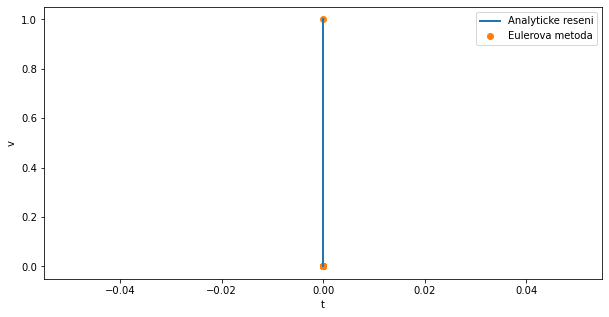

In [7]:
T = 10
N = 30
dt = T/N

t = np.empty(N)
v = np.empty(N)
v_exact = np.empty(N)

# pocatecni podminky
t[0] = 0
v[0] = 1

# presne reseni
v_exact[0] = np.exp(-t[0])

#% diferencni schema v(t+dt)-v(t)/dt = -v(t)
for i in range (1,N):
#######################################
    # vlozte vypocet t, v, v_exact:
#######################################
    t[i]=0
    v[i]=0    
    v_exact[i]=0
#######################################
    
fig, ax = plt.subplots(figsize=(10,5))    
ax.plot(t,v_exact,label='Analyticke reseni',linewidth=2)
ax.scatter(t,v,label='Eulerova metoda',color='C1')
ax.set_xlabel('t')
ax.set_ylabel('v')
ax.legend()

* **b) Dvoukroková metoda (centrální diference)**
 * derivaci nahradíme centrální diferencí s dvojnásobným krokem: $\dfrac{v(t+dt)-v(t-dt)}{2dt}=-v(t)$
 * odtud získám rychlost $v$ v čase $t+dt$: $v(d+dt)=-2v(t)dt+v(t-dt)$ 

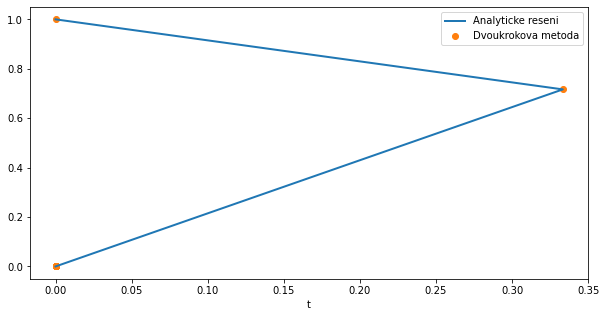

In [8]:
T = 10
N = 30
dt = T/N

t = np.empty(N)
v = np.empty(N)
v_exact = np.empty(N)

# pocatecni podminky
t[0] = 0
v[0] = 1

# druhy casovy krok
t[1] =t[0] + dt

# presne reseni v prvnich dvou bodech
v_exact[0] = np.exp(-t[0])
v_exact[1] = np.exp(-t[1])

# schema je tribodove, takze poterbujeme jeste jednu hodnotu v(2)
v[1] = v_exact[1]

# diferencni schema v(t+dt)-v(t-dt)/2dt = -v(t)
for i in range (2,N):
#######################################
    # vlozte vypocet t, v, v_exact:
#######################################
    t[i]=0
    v[i]=0    
    v_exact[i]=0
#######################################
    
fig, ax = plt.subplots(figsize=(10,5))    
ax.plot(t,v_exact,label='Analyticke reseni',linewidth=2)
ax.scatter(t,v,label='Dvoukrokova metoda',color='C1')
ax.set_xlabel('t')
ax.legend()

Velikost chyby se postupně zvyšuje, jedná se tedy o nestabilní metodu, viz [vysvětlení](http://kfe.fjfi.cvut.cz/~vachal/edu/nme/cviceni/01_chyby/DOCS/priklad_nestabilniho_algoritmu.pdf).